Tutorial Used: https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

In [1]:
import pandas as pd
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
ira_ads = pd.read_csv("cleaned_data.csv")

In [3]:
ira_ads.head()
print(len(ira_ads))

3411


In [4]:
data = ira_ads.filter(["adID","adText"], axis=1)
data.head()

,adID,adText
0,487,Join our rally atFree the patriots stand for l...
1,515,Join our rally atFree the patriots stand for l...
2,532,Join our rally atFree the patriots stand for l...
3,1863,When ur credit card gets declined and u\nprete...
4,3307,Photo by Isadora Kosofskypart of an ongoing se...


In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

data["adText_clean"] = data["adText"].apply(lambda x: remove_punct(x))

data.head()

,adID,adText,adText_clean
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...


In [7]:
import re

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens

data['adText_tokenized'] = data['adText_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,adID,adText,adText_clean,adText_tokenized
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan..."
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan..."
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan..."
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ..."
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong..."


In [8]:
stopword = nltk.corpus.stopwords.words('english')

In [9]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data["adText_nostop"] = data["adText_tokenized"].apply(lambda x: remove_stopwords(x))

data.head()

,adID,adText,adText_clean,adText_tokenized,adText_nostop
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty..."
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty..."
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty..."
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi..."
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series..."


In [10]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data["adText_stemmed"] = data["adText_nostop"].apply(lambda x: stemming(x))

data.head()

,adID,adText,adText_clean,adText_tokenized,adText_nostop,adText_stemmed
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ..."
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ..."
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ..."
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declin, u, pretend, so..."
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongo, seri, doc..."


In [11]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['adText_lemmatized'] = data["adText_nostop"].apply(lambda x: lemmatizing(x))

data.head()

,adID,adText,adText_clean,adText_tokenized,adText_nostop,adText_stemmed,adText_lemmatized
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,..."
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,..."
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,..."
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declin, u, pretend, so...","[ur, credit, card, get, declined, u, pretendin..."
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongo, seri, doc...","[photo, isadora, kosofskypart, ongoing, series..."


In [12]:
clean_text = data["adText_lemmatized"].tolist()

clean_text

[['join', 'rally', 'atfree', 'patriot', 'stand', 'liberty', 'right'],
 ['join', 'rally', 'atfree', 'patriot', 'stand', 'liberty', 'right'],
 ['join', 'rally', 'atfree', 'patriot', 'stand', 'liberty', 'right'],
 ['ur',
  'credit',
  'card',
  'get',
  'declined',
  'u',
  'pretending',
  'sort',
  'bank',
  'u',
  'know',
  'u',
  'really',
  'broke',
  'af'],
 ['photo',
  'isadora',
  'kosofskypart',
  'ongoing',
  'series',
  'documenting',
  'bonding',
  'visit',
  'child',
  'incarcerated',
  'parent',
  'eight',
  'men',
  'woman',
  'prison',
  'florida'],
 ['eric',
  'driester',
  'welcomed',
  'great',
  'john',
  'pilger',
  'back',
  'counterpunch',
  'radio',
  'week',
  'discus',
  'monstrosity',
  'known',
  'hillaryclinton',
  'danger',
  'clinton',
  'presidency'],
 ['join', 'rally', 'atfree', 'patriot', 'stand', 'liberty', 'right'],
 ['stand', 'people', 'government', 'join', 'rally', 'georgia'],
 ['never',
  'piss',
  'woman',
  'remember',
  'stuff',
  'hasnt',
  'even'

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['adText'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(3411, 16722)
['aaron', 'abaltimore', 'abandoned', 'abaton', 'abattleground', 'abc', 'abdulazeez', 'abdulwali', 'abdussalaam', 'abdussalaams', 'abehavior', 'abilities', 'ability', 'abillion', 'abit', 'abizarre', 'abject', 'ablack', 'ablackwomanurban', 'able', 'abnormal', 'abolish', 'abortion', 'abortionsdo', 'about', 'abouta', 'aboutam', 'aboutbeing', 'aboutbillion', 'aboutblack', 'aboutblm', 'aboutcastros', 'aboutdeportationclinton', 'aboutdiscussing', 'aboutelections', 'aboutface', 'aboutfreedom', 'abouthave', 'abouthis', 'aboutholding', 'abouthome', 'abouthomosexuality', 'abouthours', 'abouthouses', 'abouthowever', 'aboutinmates', 'aboutinterhuman', 'aboutlebron', 'aboutmarines', 'aboutmiles', 'aboutof', 'aboutother', 'aboutour', 'aboutoutrageous', 'aboutpeople', 'aboutpercent', 'aboutpm', 'aboutpolice', 'aboutpunishment', 'aboutracism', 'aboutsoldiers', 'aboutsuch', 'aboutteacherswere', 'aboutterrence', 'aboutthe', 'aboutthreats', 'abouttop', 'abouttrans', 'abouttycoons', 'aboutwhi

In [14]:
import string

data['adText_len'] = data["adText"].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data["punct%"] = data["adText"].apply(lambda x: count_punct(x))

data.head()

,adID,adText,adText_clean,adText_tokenized,adText_nostop,adText_stemmed,adText_lemmatized,adText_len,punct%
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declin, u, pretend, so...","[ur, credit, card, get, declined, u, pretendin...",93,0.0
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongo, seri, doc...","[photo, isadora, kosofskypart, ongoing, series...",147,0.0


In [15]:
data["label"] = "IRA"

In [16]:
data.head()

,adID,adText,adText_clean,adText_tokenized,adText_nostop,adText_stemmed,adText_lemmatized,adText_len,punct%,label
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declin, u, pretend, so...","[ur, credit, card, get, declined, u, pretendin...",93,0.0,IRA
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongo, seri, doc...","[photo, isadora, kosofskypart, ongoing, series...",147,0.0,IRA


In [17]:
data = data.append(pd.read_csv("FBAPI_NLP.csv"), ignore_index=True, sort=False)

data

,adID,adText,adText_clean,adText_tokenized,adText_nostop,adText_stemmed,adText_lemmatized,adText_len,punct%,label,Unnamed: 0
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,NaN
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,NaN
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,NaN
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declin, u, pretend, so...","[ur, credit, card, get, declined, u, pretendin...",93,0.0,IRA,NaN
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongo, seri, doc...","[photo, isadora, kosofskypart, ongoing, series...",147,0.0,IRA,NaN
5,1298,Eric Driester I welcomed the great John Pilger...,Eric Driester I welcomed the great John Pilger...,"[eric, driester, i, welcomed, the, great, john...","[eric, driester, welcomed, great, john, pilger...","[eric, driester, welcom, great, john, pilger, ...","[eric, driester, welcomed, great, john, pilger...",149,0.0,IRA,NaN
6,486,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,NaN
7,496,Stand for the people not the government Join o...,Stand for the people not the government Join o...,"[stand, for, the, people, not, the, government...","[stand, people, government, join, rally, georgia]","[stand, peopl, govern, join, ralli, georgia]","[stand, people, government, join, rally, georgia]",54,0.0,IRA,NaN
8,1734,Never piss off a woman\nThey remember stuff th...,Never piss off a woman\nThey remember stuff th...,"[never, piss, off, a, woman, they, remember, s...","[never, piss, woman, remember, stuff, hasnt, e...","[never, piss, woman, rememb, stuff, hasnt, eve...","[never, piss, woman, remember, stuff, hasnt, e...",61,0.0,IRA,NaN
9,1736,When youre in the toilet and someone\nstarts b...,When youre in the toilet and someone\nstarts b...,"[when, youre, in, the, toilet, and, someone, s...","[youre, toilet, someone, starts, banging, door...","[your, toilet, someon, start, bang, door, fini...","[youre, toilet, someone, start, banging, door,...",96,0.0,IRA,NaN


In [18]:
data.rename(columns = {"Unnamed: 0":"ID"}, inplace=True)
data["ID"] = data.index
data.head()

,adID,adText,adText_clean,adText_tokenized,adText_nostop,adText_stemmed,adText_lemmatized,adText_len,punct%,label,ID
0,487,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,0
1,515,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,1
2,532,Join our rally atFree the patriots stand for l...,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, ralli, atfre, patriot, stand, liberti, ...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,2
3,1863,When ur credit card gets declined and u\nprete...,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declin, u, pretend, so...","[ur, credit, card, get, declined, u, pretendin...",93,0.0,IRA,3
4,3307,Photo by Isadora Kosofskypart of an ongoing se...,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongo, seri, doc...","[photo, isadora, kosofskypart, ongoing, series...",147,0.0,IRA,4


In [19]:
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

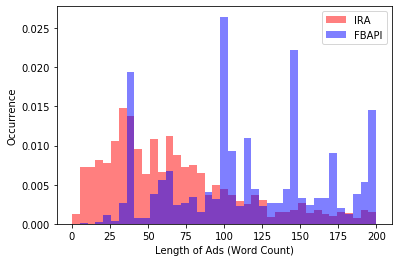

In [20]:
bins = np.linspace(0,200,40)

plt.hist(data[data['label']=='IRA']["adText_len"], bins, alpha = 0.5, normed = True, label="IRA", color = "red")
plt.hist(data[data['label']=='FBAPI']["adText_len"], bins, alpha = 0.5, normed = True, label="FBAPI", color = "blue")
plt.legend(loc='upper right')
plt.xlabel("Length of Ads (Word Count)")
plt.ylabel("Occurrence")
plt.savefig("chart_adlength.png", dpi=300)
plt.show


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

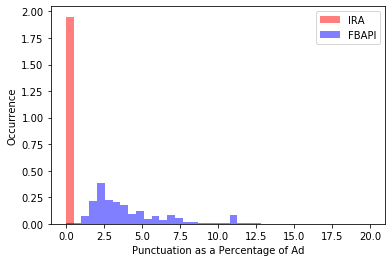

In [21]:
bins = np.linspace(0,20,40)

plt.hist(data[data['label']=='IRA']["punct%"], bins, alpha = 0.5, normed = True, label="IRA", color = "red")
plt.hist(data[data['label']=='FBAPI']["punct%"], bins, alpha = 0.5, normed = True, label="FBAPI", color = "blue")
plt.legend(loc='upper right')
plt.xlabel("Punctuation as a Percentage of Ad")
plt.ylabel("Occurrence")
plt.savefig("chart_punctuation.png", dpi=300)
plt.show

In [22]:
from sklearn.model_selection import train_test_split

X=data[['adText', 'adText_len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [23]:
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train['adText'])

tfidf_train = tfidf_vect_fit.transform(X_train['adText'])
tfidf_test = tfidf_vect_fit.transform(X_test['adText'])

X_train_vect = pd.concat([X_train[['adText_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['adText_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,adText_len,punct%,0,1,2,3,4,5,6,7,...,21916,21917,21918,21919,21920,21921,21922,21923,21924,21925
0,193,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,315,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,405,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='IRA', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))



Precision: 0.996 / Recall: 1.0 / F1-Score: 0.998 / Accuracy: 0.998


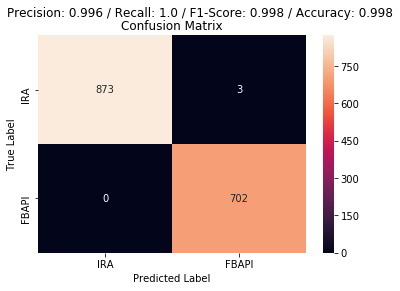

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["IRA", "FBAPI"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.suptitle('Precision: 0.996 / Recall: 1.0 / F1-Score: 0.998 / Accuracy: 0.998')
plt.savefig("confusion_matrix.png", dpi = 300)
plt.show()

In [26]:
data.to_csv("FB_IRA_Cleaned.csv")

In [34]:
showdata = data
showdata = showdata.drop(["adID","adText_clean","adText_stemmed"], axis=1)

showdata = showdata.rename(columns={"adText":"Ad Text",
                        "adText_tokenized":"Tokenized Ad Text",
                        "adText_nostop":"Ad Text with Stop Words Removed",
                        "adText_lemmatized":"Lemmatized Ad Text",
                        "adText_len":"Length of Ad Text by Word",
                        "punct%":"Punctuation as a Percent of Ad",
                        "label":"Label"})
showdata.head()

,Ad Text,Tokenized Ad Text,Ad Text with Stop Words Removed,Lemmatized Ad Text,Length of Ad Text by Word,Punctuation as a Percent of Ad,Label,ID
0,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,0
1,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,1
2,Join our rally atFree the patriots stand for l...,"[join, our, rally, atfree, the, patriots, stan...","[join, rally, atfree, patriots, stand, liberty...","[join, rally, atfree, patriot, stand, liberty,...",56,0.0,IRA,2
3,When ur credit card gets declined and u\nprete...,"[when, ur, credit, card, gets, declined, and, ...","[ur, credit, card, gets, declined, u, pretendi...","[ur, credit, card, get, declined, u, pretendin...",93,0.0,IRA,3
4,Photo by Isadora Kosofskypart of an ongoing se...,"[photo, by, isadora, kosofskypart, of, an, ong...","[photo, isadora, kosofskypart, ongoing, series...","[photo, isadora, kosofskypart, ongoing, series...",147,0.0,IRA,4


In [37]:
showdata = showdata[["ID",
                     "Label",
                     "Ad Text", 
                     "Tokenized Ad Text",
                     "Ad Text with Stop Words Removed",
                     "Lemmatized Ad Text",
                     "Length of Ad Text by Word",
                     "Punctuation as a Percent of Ad",
                    ]]

showdata.head()
showdata.to_csv("data_for_display.csv")